# 逻辑回归

逻辑回归主要应用与分类的问题，Logistic 回归的本质是：假设数据服从这个分布，然后使用极大似然估计做参数的估计。
Logistic 回归的分布函数写为：$$F(x) = P(X \le x ) = \frac{1}{1 + e^{-(x-\mu)} / \gamma }$$
密度函数：$$f(x) = F'(X \le x) = \frac{e^{-(x-\mu)/\gamma}}{\gamma(1 + e ^ {-(x - \mu) / \gamma}) ^ {2}}$$
$\mu —————— 位置参数$  
$\gamma —————— 形状参数$

使用对数几率函数来拟合条件概率。$$y = \frac{1}{1+e^{-(w^Tx + b)}}$$  
于是有：  
$$ln\frac{y}{1-y}=w^Tx + b$$

将 y 视为 x 为正例的概率，则 1-y 为 x 为其反例的概率。两者的比值称为几率（odds），指该事件发生与不发生的概率比值，若事件发生的概率为 p。则对数几率：$$ln(odds)=ln\frac{y}{1-y}$$
进而可以得出：$$w^Tx+b = ln\frac{P(Y=1|x)}{1-P(Y=1|x)}$$
$$P(Y=1|x)=\frac{1}{1+e^{-(w^Tx + b)}}$$

设 $P(Y=1|X)=p(x)$  
$P(Y=0|x)=1-p(x)$  
似然函数：  
$$L(w)=\prod \left [ p(x_i) \right ]^{y_i}\left [ 1-p(x_i) \right ]^{1-y_i} $$  
对数似然函数：
$$L(w)=\sum \left [ y_ilnp(x_i)+(1-y_i)ln(1-p(x_i)) \right ] $$
$$=\sum \left [ y_iln\frac{p(x_i)}{1-p(x_i)}+ln(1-p(x_i)) \right ]$$
$$=\sum \left [ y_i(w\cdot x_i) - ln(1+e^{w\cdot x_i}) \right ] $$
代价函数：
$$J(w)=-\frac{1}{N}lnL(w)$$

In [1]:
import torch 
import torch.autograd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

读数据集

In [2]:
data_set = pd.read_csv("ionosphere_data_kaggle.csv")

In [3]:
data_set.describe

<bound method NDFrame.describe of      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
1           1         0   1.00000  -0.18829   0.93035  -0.36156  -0.10868   
2           1         0   1.00000  -0.03365   1.00000   0.00485   1.00000   
3           1         0   1.00000  -0.45161   1.00000   1.00000   0.71216   
4           1         0   1.00000  -0.02401   0.94140   0.06531   0.92106   
..        ...       ...       ...       ...       ...       ...       ...   
346         1         0   0.83508   0.08298   0.73739  -0.14706   0.84349   
347         1         0   0.95113   0.00419   0.95183  -0.02723   0.93438   
348         1         0   0.94701  -0.00034   0.93207  -0.03227   0.95177   
349         1         0   0.90608  -0.01657   0.98122  -0.01989   0.95691   
350         1         0   0.84710   0.13533   0.73638  -0.06151   0.87873   

     feature8  feature9  feature10  ...  

划分数据集

In [4]:
x = data_set.loc[:, "feature3": "feature4"]
y = data_set.loc[:, "label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train["feature3"] = x_train["feature3"].astype('float')
x_train["feature4"] = x_train["feature4"].astype('float')

# 编码
enc=preprocessing.LabelEncoder()   #获取一个LabelEncoder
enc=enc.fit(["g", "b"])  #训练LabelEncoder
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

y_train  = y_train.astype('float')
y_test  = y_test.astype('float')
x_test["feature3"] = x_test["feature3"].astype('float')
x_test["feature4"] = x_test["feature4"].astype('float')

# 将 pandas.DataFrame 转为 torch.tensor
x1_train = torch.tensor(x_train["feature3"].values, requires_grad=True)
x2_train = torch.tensor(x_train["feature4"].values, requires_grad=True)
y_train = torch.tensor(y_train, requires_grad=True)
y_test = torch.tensor(y_test, requires_grad=True)
x1_test = torch.tensor(x_test["feature3"].values, requires_grad=True)
x2_test = torch.tensor(x_test["feature4"].values, requires_grad=True)

In [9]:
def sigmoid(w1, w2, b, x1, x2):
    return 1 / (1 + torch.exp(-(w2 * x2 + b + w1 * x1 )))

In [17]:
l_rate = 0.01
n = torch.tensor([x_train.size / 2], requires_grad=True)
w1 = torch.tensor([1.0], requires_grad=True)
w2 = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

for i in range(0, 100):
    J = torch.log(sigmoid(w1, w2, b, x1_train, x2_train))
    J = J.sum() / n
    J.backward()
    with torch.no_grad():
        w1.data = w1.data - l_rate * (w1.grad.data )
        w2.data = w2.data - l_rate * (w2.grad.data  )
        b.data = b.data - l_rate * (b.grad.data )
        print("第 %d 次 w1 = %f, w2 = %f, b = %f" % (i, w1.data, w2.data, b.data))
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

第 0 次 w1 = 0.999316, w2 = 1.000252, b = 0.998255
第 1 次 w1 = 0.998630, w2 = 1.000504, b = 0.996508
第 2 次 w1 = 0.997943, w2 = 1.000757, b = 0.994758
第 3 次 w1 = 0.997254, w2 = 1.001009, b = 0.993005
第 4 次 w1 = 0.996563, w2 = 1.001262, b = 0.991249
第 5 次 w1 = 0.995870, w2 = 1.001516, b = 0.989491
第 6 次 w1 = 0.995176, w2 = 1.001769, b = 0.987730
第 7 次 w1 = 0.994480, w2 = 1.002023, b = 0.985966
第 8 次 w1 = 0.993782, w2 = 1.002277, b = 0.984199
第 9 次 w1 = 0.993082, w2 = 1.002531, b = 0.982429
第 10 次 w1 = 0.992380, w2 = 1.002785, b = 0.980656
第 11 次 w1 = 0.991677, w2 = 1.003040, b = 0.978881
第 12 次 w1 = 0.990972, w2 = 1.003295, b = 0.977102
第 13 次 w1 = 0.990265, w2 = 1.003550, b = 0.975321
第 14 次 w1 = 0.989557, w2 = 1.003806, b = 0.973537
第 15 次 w1 = 0.988846, w2 = 1.004061, b = 0.971750
第 16 次 w1 = 0.988134, w2 = 1.004317, b = 0.969960
第 17 次 w1 = 0.987420, w2 = 1.004574, b = 0.968167
第 18 次 w1 = 0.986704, w2 = 1.004830, b = 0.966372
第 19 次 w1 = 0.985986, w2 = 1.005087, b = 0.964573
第 20 次 w1 

0.746862530708313
0.6625729203224182
0.692169189453125
0.7900126576423645
0.7641900777816772
0.8640221357345581
0.692169189453125
0.5971936583518982
0.692169189453125
0.8328613042831421
0.7291300296783447
0.865571141242981
0.6922353506088257
0.8276471495628357
0.8039082884788513
0.7640975713729858
0.9001440405845642
0.850832462310791
0.8133822679519653
0.7051936984062195
0.8357623219490051
0.6975641846656799
0.8162142634391785
0.8774958252906799
0.8697193264961243
0.7792525887489319
0.2426590770483017
0.8876644372940063
0.8258408308029175
0.856269896030426
0.9404036998748779
0.8085427284240723
0.8658859729766846
0.8482764363288879
0.2426590770483017
0.858634889125824
0.8486825227737427
0.8041900992393494
0.8293172717094421
0.8447434902191162
0.8741629123687744
0.7549640536308289
0.692169189453125
0.8396966457366943
0.7942565679550171
0.7701721787452698
0.7139797210693359
0.6694654226303101
0.8142650127410889
0.9126294851303101
0.8085222244262695
0.7869599461555481
0.8476905226707458
0.

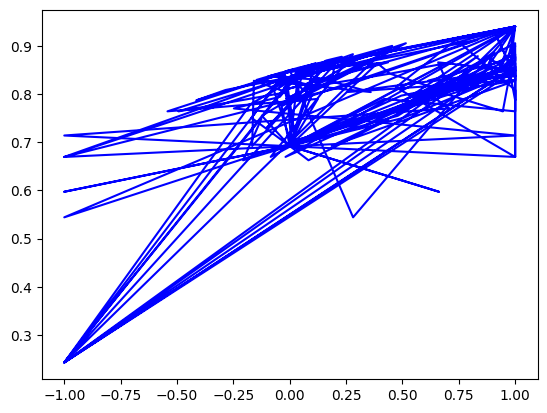

In [18]:
y_hat = np.zeros(int(x_test.size / 2))
for i in range(int(x_test.size / 2)):
    y_hat[i] = sigmoid(w1, w2, b, x1_test[i], x2_test[i])
    print(y_hat[i])

plt.plot(x_test, y_hat, c = "b")
plt.show()